<a href="https://colab.research.google.com/github/Cheruugit/ML_Playground/blob/main/Customer_Segmentation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Dataset

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

	Segmentation data - Legend
	The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers.

	Variable	Data type	Range	Description
	ID	numerical	Integer	Shows a unique identificator of a customer.

	Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.
			0	male
			1	female

	Marital status	categorical	{0,1}	Marital status of a customer.
			0	single
			1	non-single (divorced / separated / married / widowed)

	Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset
			18	Min value (the lowest age observed in the dataset)
			76	Max value (the highest age observed in the dataset)

	Education	categorical	{0,1,2,3}	Level of education of the customer
			0	other / unknown
			1	high school
			2	university
			3	graduate school

	Income	numerical	Real	Self-reported annual income in US dollars of the customer.
			35832	Min value (the lowest income observed in the dataset)
			309364	Max value (the highest income observed in the dataset)

	Occupation	categorical	{0,1,2}	Category of occupation of the customer.
			0	unemployed / unskilled
			1	skilled employee / official
			2	management / self-employed / highly qualified employee / officer

	Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.
			0	small city
			1	mid-sized city
			2	big city

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [ ]:
df.duplicated().sum()

0

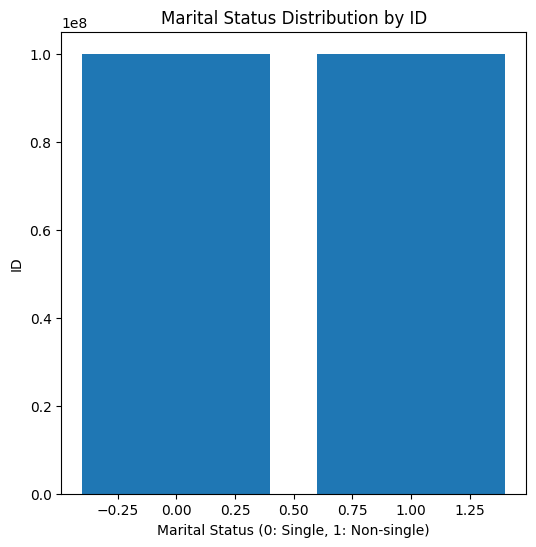

In [ ]:
#The distribution of customers differ based on their marital status?
plt.figure(figsize=(6, 6))
plt.bar(df['Marital status'],df['ID'])
plt.xlabel('Marital Status (0: Single, 1: Non-single)')
plt.ylabel('ID')
plt.title('Marital Status Distribution by ID')
plt.show()


The number of individuals classified as 'single' is comparable to the combined count of those categorized as 'non-single' (divorced/separated/married/widowed).

<Axes: xlabel='Settlement size', ylabel='count'>

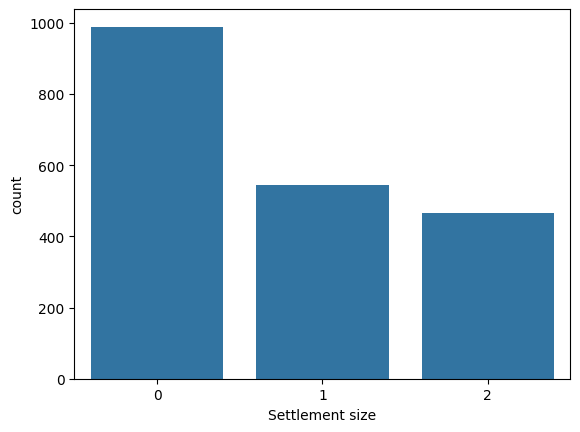

In [ ]:
sns.countplot(x='Settlement size', data=df)

The population distribution across settlement sizes indicates that small cities have the highest population, followed by mid-sized cities and then big cities

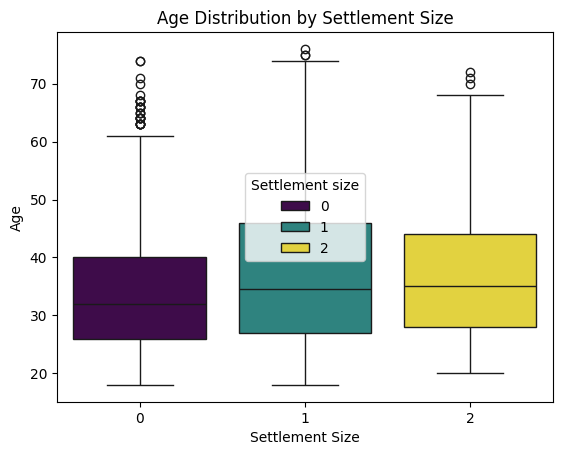

In [ ]:
#What is the age distribution of customers within each settlement size category?
sns.boxplot(x='Settlement size', y='Age', data=df,hue='Settlement size', palette='viridis')
plt.xlabel('Settlement Size')
plt.ylabel('Age')
plt.title('Age Distribution by Settlement Size')
plt.show()


Small cities have a lower median age, suggesting a younger demographic. Also the age range in small cities is more tightly clustered, reflecting a narrower spread of ages.

The mid-sized cities age distribution is characterized by a broader spread, encompassing a more diverse range of ages.

Despite the big cities having a wide spread of ages, they have a shorter IQR suggesting that majority of individuals cluster around a narrower age range.  

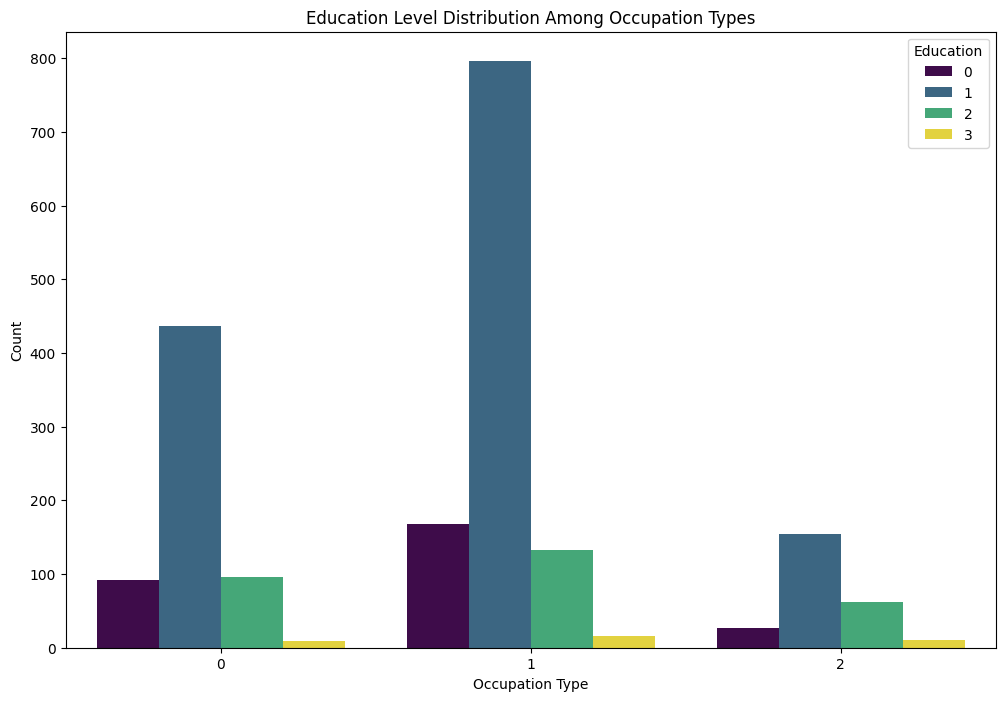

In [ ]:
#How does education level vary among different occupation types?
plt.figure(figsize=(12, 8))
sns.countplot(x='Occupation', hue='Education', data=df, palette='viridis')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Education Level Distribution Among Occupation Types')
plt.show()


High school graduates are the most common education level across all occupations.
University education (2) is prevalent in skilled employee/official (Occupation 1) and management/self-employed/highly qualified (Occupation 2) professions.
Graduate school education (3) is present in all three occupations, with varying concentrations.

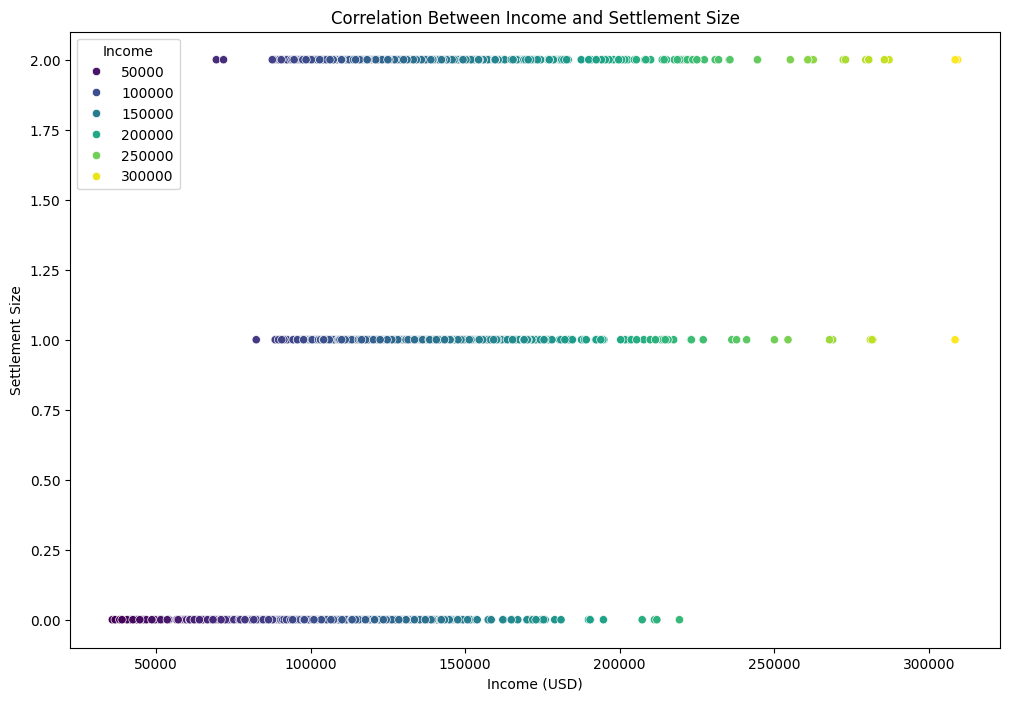

Correlation Coefficient: 0.49088092879258705


In [ ]:
#Can you identify any correlations between income and settlement size?
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Settlement size',hue='Income', data=df, palette='viridis')
plt.xlabel('Income (USD)')
plt.ylabel('Settlement Size')
plt.title('Correlation Between Income and Settlement Size')
plt.show()

correlation_coefficient = df['Income'].corr(df['Settlement size'])
print(f"Correlation Coefficient: {correlation_coefficient}")


We can observe that income tends to increase as settlement size goes from small cities to big cities which suggests a pattern of economic variation across different settlement sizes.

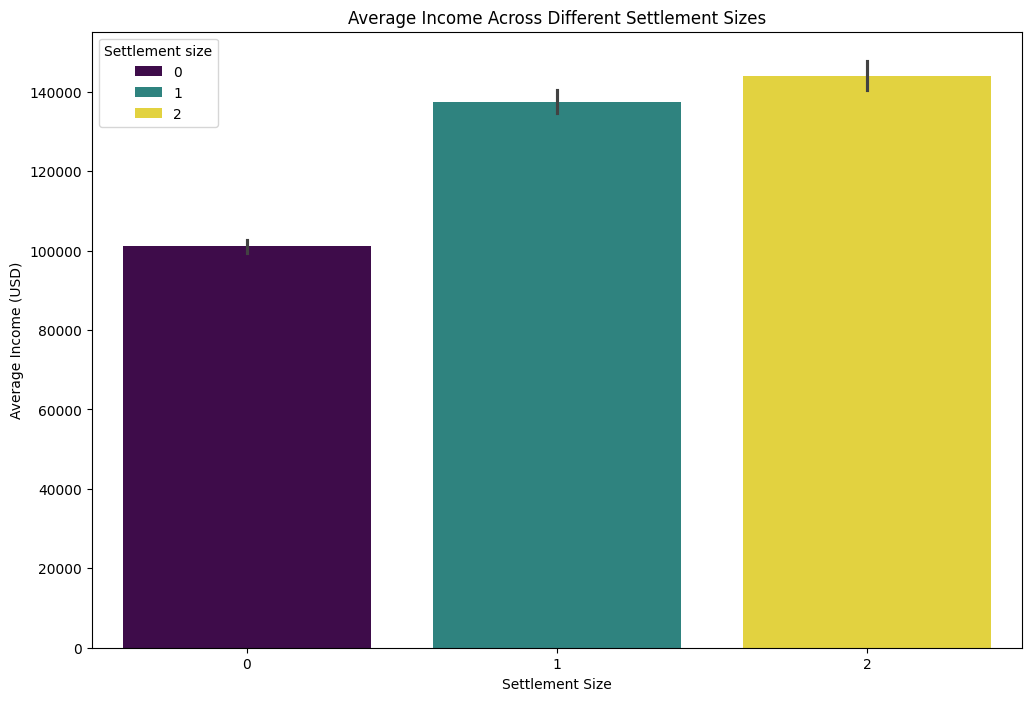

In [ ]:
# Create a bar plot showing average income for each settlement size
plt.figure(figsize=(12, 8))
sns.barplot(x='Settlement size', y='Income',hue='Settlement size', data=df, palette='viridis')
plt.xlabel('Settlement Size')
plt.ylabel('Average Income (USD)')
plt.title('Average Income Across Different Settlement Sizes')
plt.show()

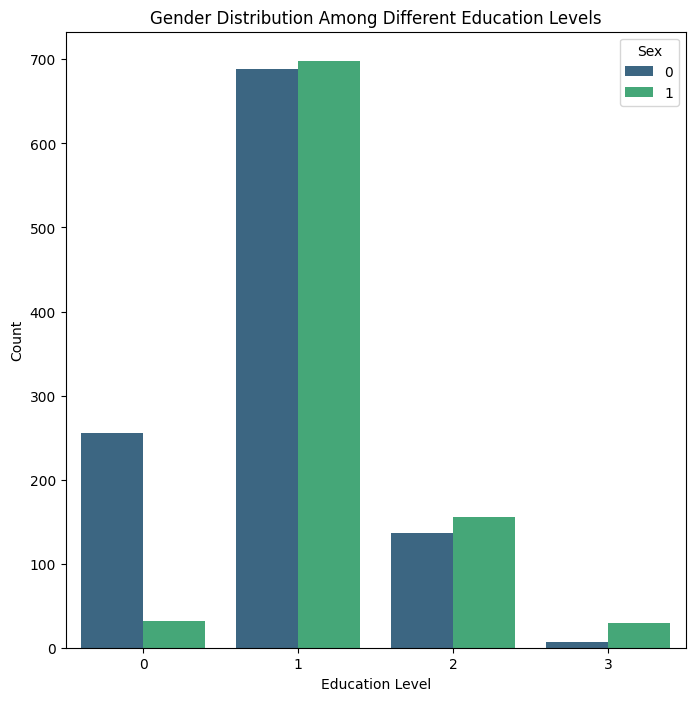

In [ ]:
#Gender Distribution Among Different Education Levels
plt.figure(figsize=(8, 8))
sns.countplot(x='Education', hue='Sex', data=df, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Gender Distribution Among Different Education Levels')
plt.show()


More males fall under the category of 'Other/Unknown' education compared to females.

High school graduates (Education level 1) are well-represented for both genders.

The count of females  with a university education (Education level 2) slightly surpasses the count of males

Despite those with graduate school education are relatvely low it seems that they have more females than male.

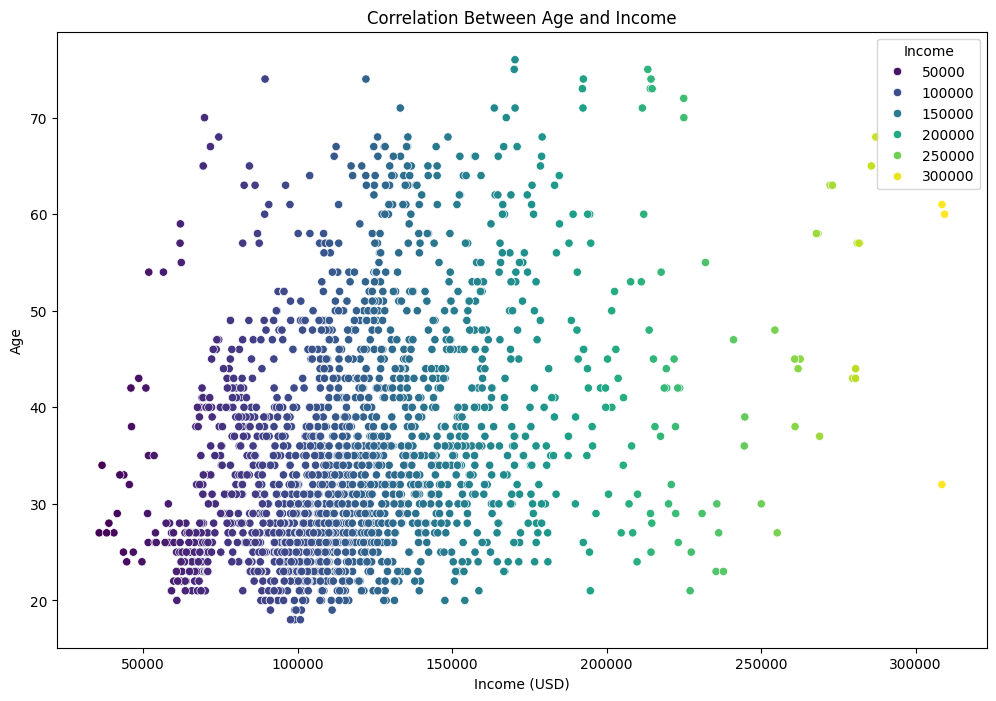

Correlation Coefficient: 0.3406101637317352


In [ ]:
#	How does age correlate with income?
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Income', y='Age',hue='Income', data=df, palette='viridis')
plt.xlabel('Income (USD)')
plt.ylabel('Age')
plt.title('Correlation Between Age and Income')
plt.show()

correlation_coefficient = df['Age'].corr(df['Income'])
print(f"Correlation Coefficient: {correlation_coefficient}")


I cant seem to pinpoint if there is a correlation between age and income we`ll have to visualize the average income for each age group.

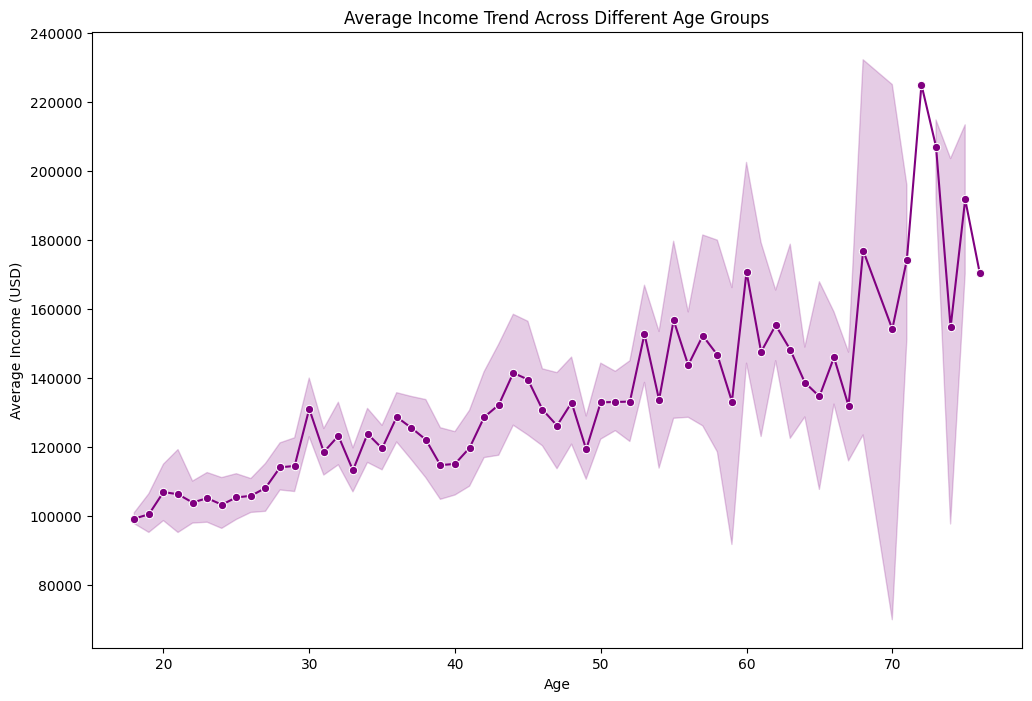

In [ ]:
# Create a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Age', y='Income', data=df, marker='o', color='purple')
plt.xlabel('Age')
plt.ylabel('Average Income (USD)')
plt.title('Average Income Trend Across Different Age Groups')
plt.show()


I can note that there is an increase in income as the age increases

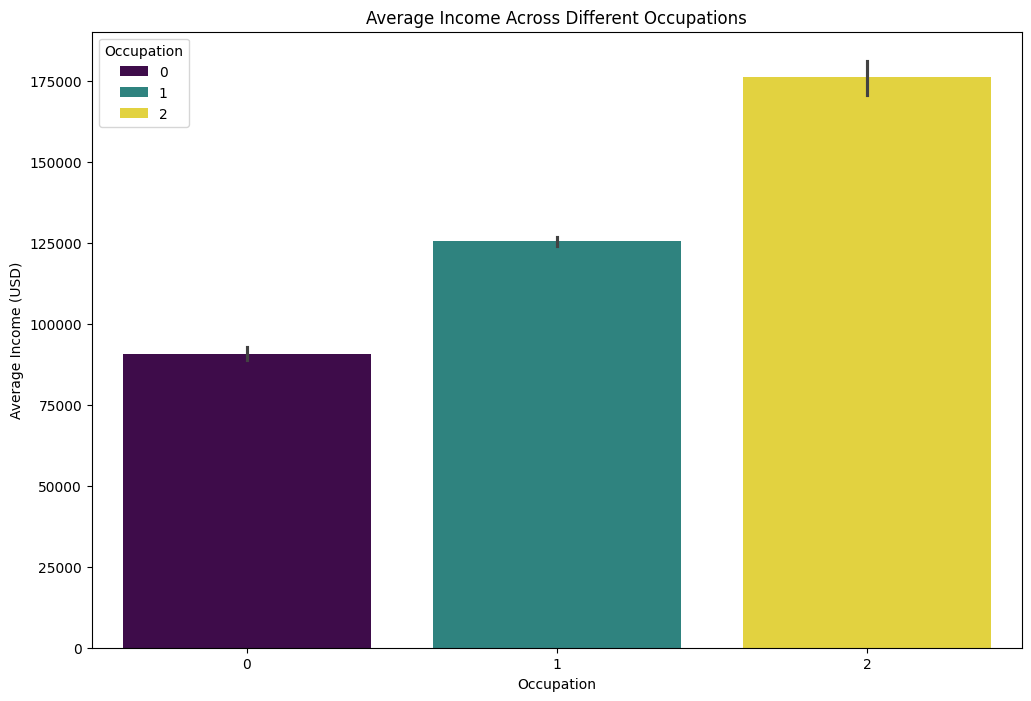

In [ ]:
#	Are there any specific occupations that are more prevalent among customers with higher incomes?
# Create a bar plot showing the average income for each occupation
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Income',hue='Occupation', data=df, palette='viridis')
plt.xlabel('Occupation')
plt.ylabel('Average Income (USD)')
plt.title('Average Income Across Different Occupations')
plt.show()


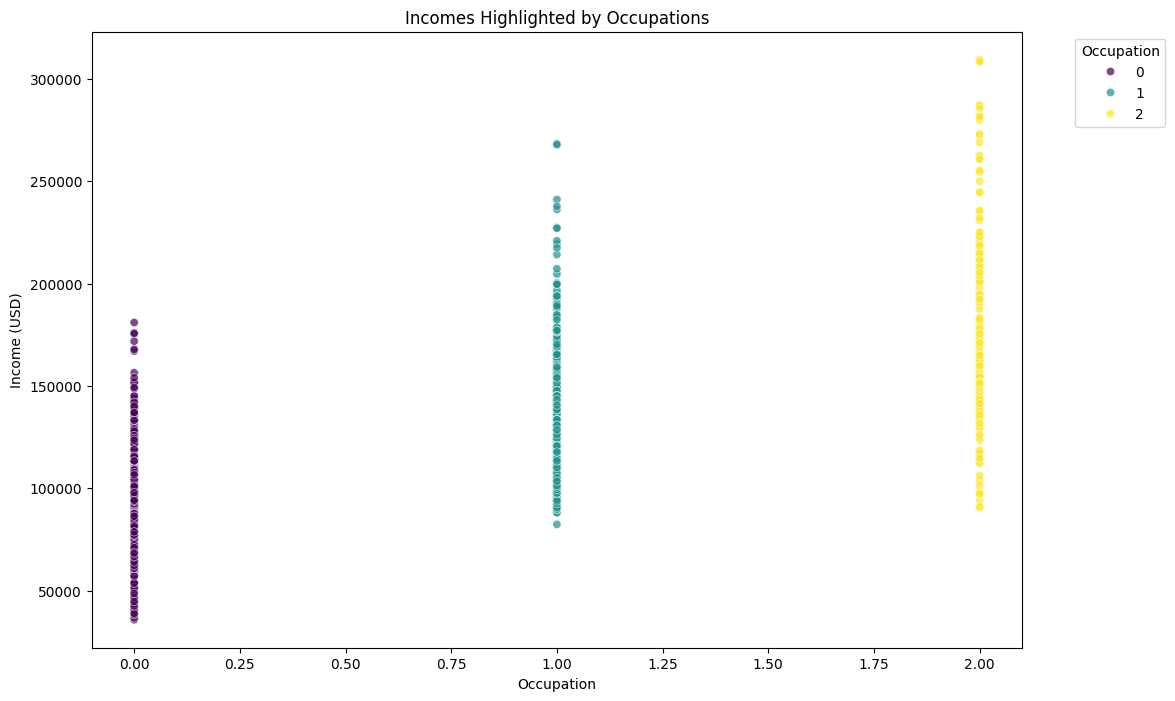

In [ ]:
##	Are there any specific occupations that are more prevalent among customers with higher incomes?
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Occupation', y='Income', hue='Occupation', data=df, palette='viridis', alpha=0.7)
plt.xlabel('Occupation')
plt.ylabel('Income (USD)')
plt.title('Incomes Highlighted by Occupations')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


 Customers in this category Management and Highly Qualified Occupations (Occupation 2) generally have higher incomes which indicates a concentration of individuals with higher earning potential.

Individuals in this category Unemployed/Unskilled Occupations (Occupation 0) tend to have the lowest incomes which suggests a link between unemployment or unskilled employment and lower income levels.

"Skilled Employee / Official (Occupation 1)" shows a higher income range compared to unskilled occupations (Occupation 0) that highlights the income disparity between skilled and unskilled occupations, with skilled employees having a broader income range.

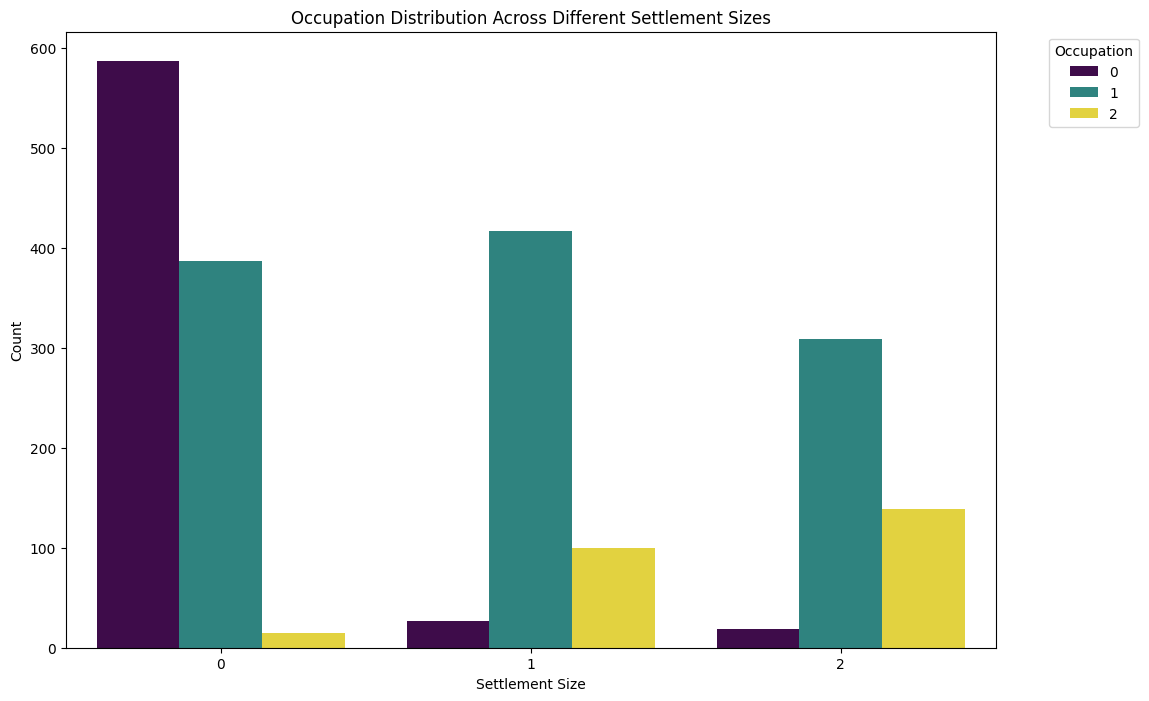

In [ ]:
# Explore occupation distribution across settlement sizes
plt.figure(figsize=(12, 8))
sns.countplot(x='Settlement size', hue='Occupation', data=df, palette='viridis')
plt.xlabel('Settlement Size')
plt.ylabel('Count')
plt.title('Occupation Distribution Across Different Settlement Sizes')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Small cities have a higher representation of unemployed or unskilled individuals, while mid-sized and big cities show a more substantial presence of skilled employees and individuals in management or highly qualified occupations.

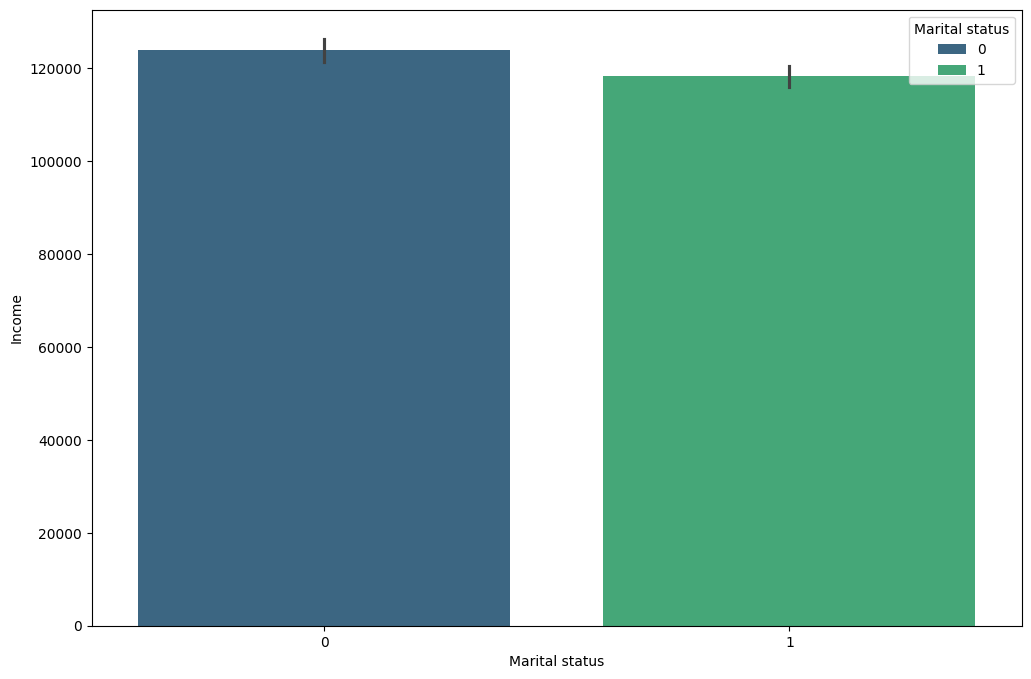

In [ ]:
#? Are married individuals more likely to have higher incomes compared to other marital statuses?
plt.figure(figsize=(12, 8))
sns.barplot(x='Marital status', y='Income',hue='Marital status', data=df, palette='viridis')
plt.xlabel('Marital status')
plt.show()

Non-married individuals exhibit a slightly higher average income compared to their married counterparts

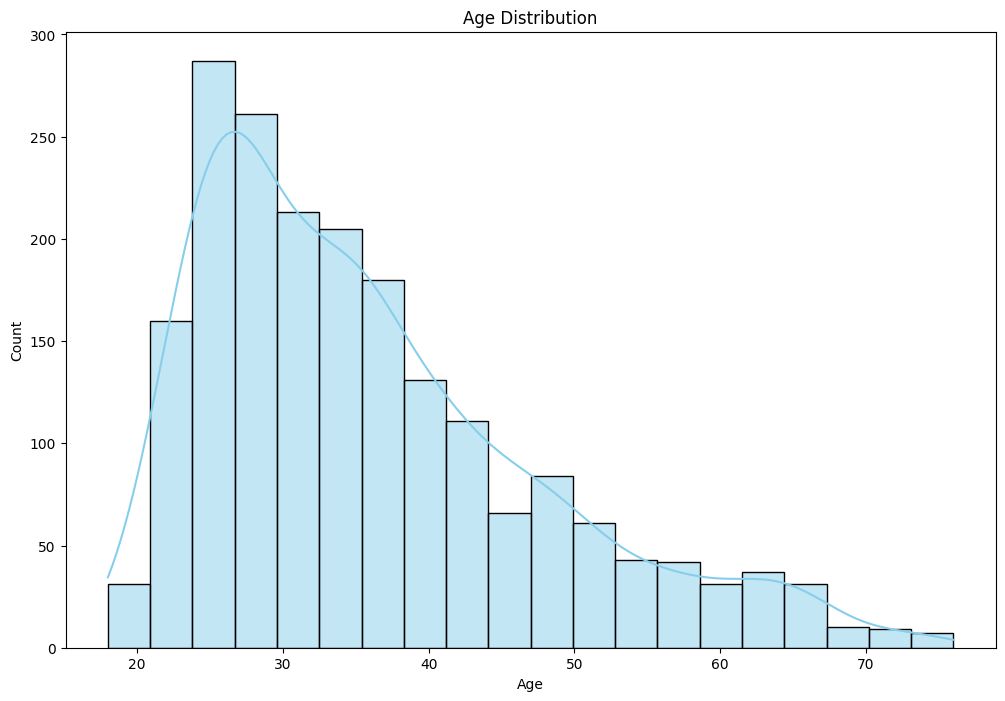

In [ ]:
# Create a histogram for age distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


The largest customer base is concentrated in the age range of 22 to 40

In [ ]:
df['Age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

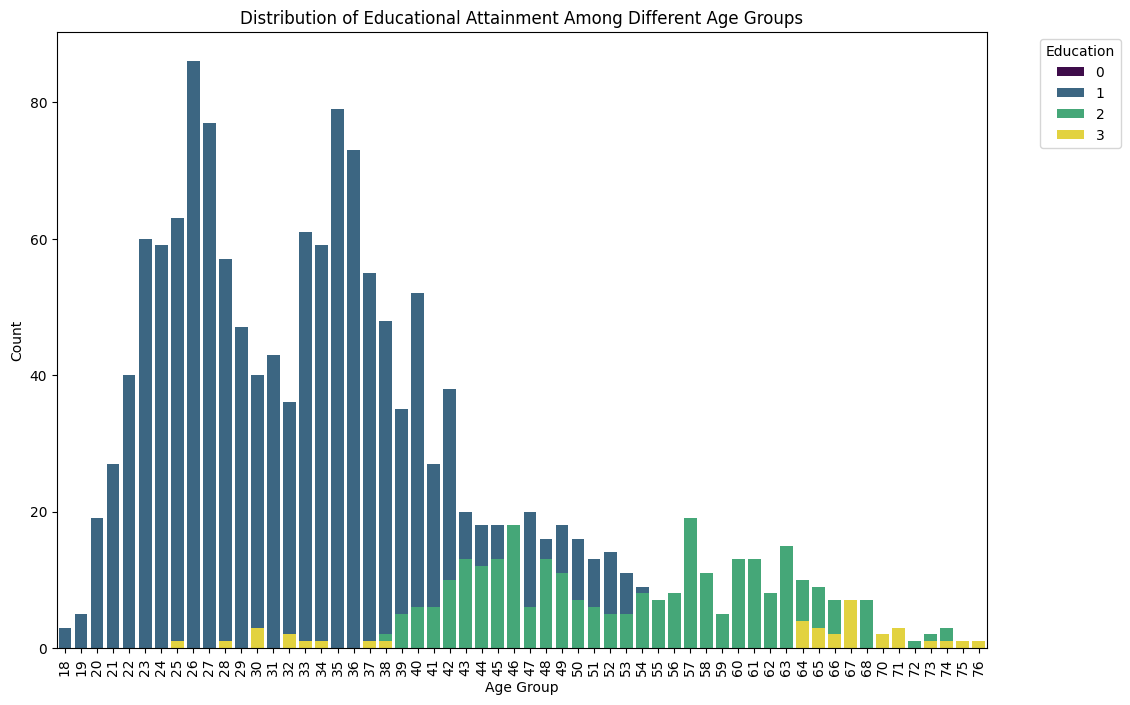

In [ ]:
#	How does the distribution of educational attainment differ among different age groups?
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Education', data=df, palette='viridis', dodge=False)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Educational Attainment Among Different Age Groups')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()



The age ranges from 18 to 38 form a period focused on high school education.

Ages 39 to 53 represent a stage with a diverse mix of both university and high school education.

Ages 54 to 63 are characterized by a consistent emphasis on university-level education.

From ages 64 to 76, there is a blend of graduate school and university-level education.

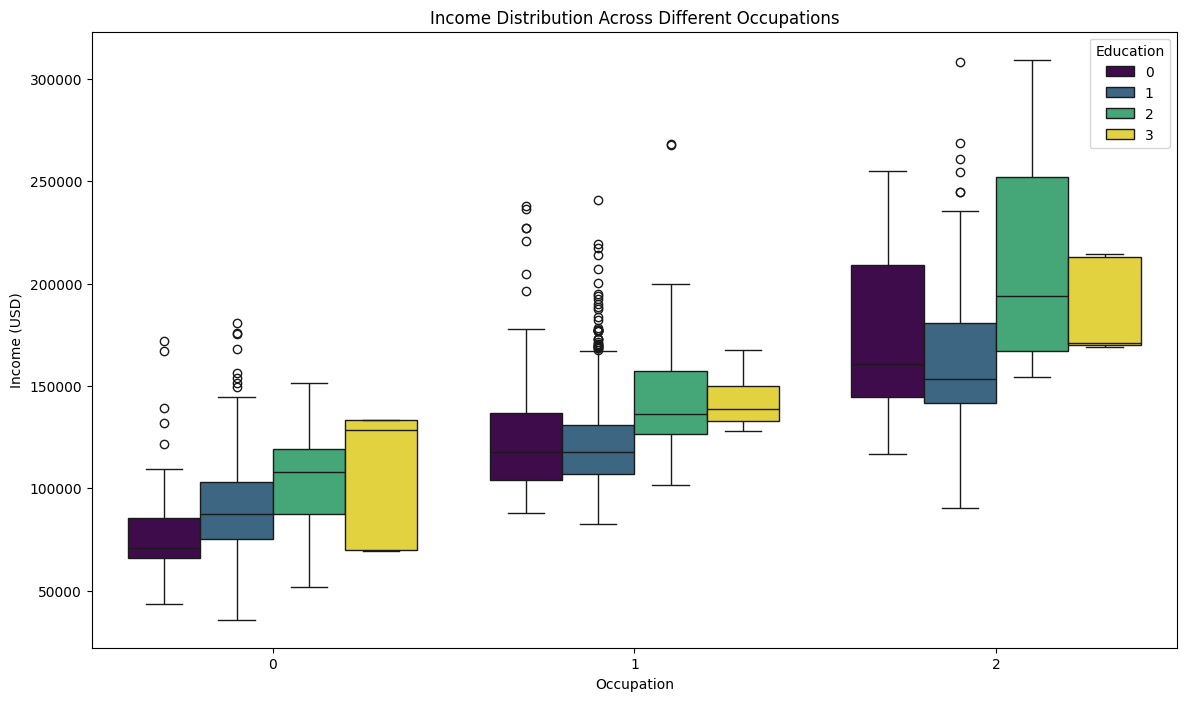

In [ ]:
#Do certain occupations tend to have higher incomes regardless of education?
plt.figure(figsize=(14, 8))
sns.boxplot(x='Occupation', y='Income',hue='Education', data=df, palette='viridis')
plt.xlabel('Occupation')
plt.ylabel('Income (USD)')
plt.title('Income Distribution Across Different Occupations')
plt.show()


In Unskilled Occupation (Occupation 0): Income demonstrates an increasing trend with higher education levels within the unskilled occupation.
The progression is evident from 'unknown' education to 'high school,' 'university,' and ultimately 'graduate school.'

In both Skilled Employee (Occupation 1) and Managerial Roles (Occupation 2): No discernible pattern is observed between education and income for skilled employee roles.

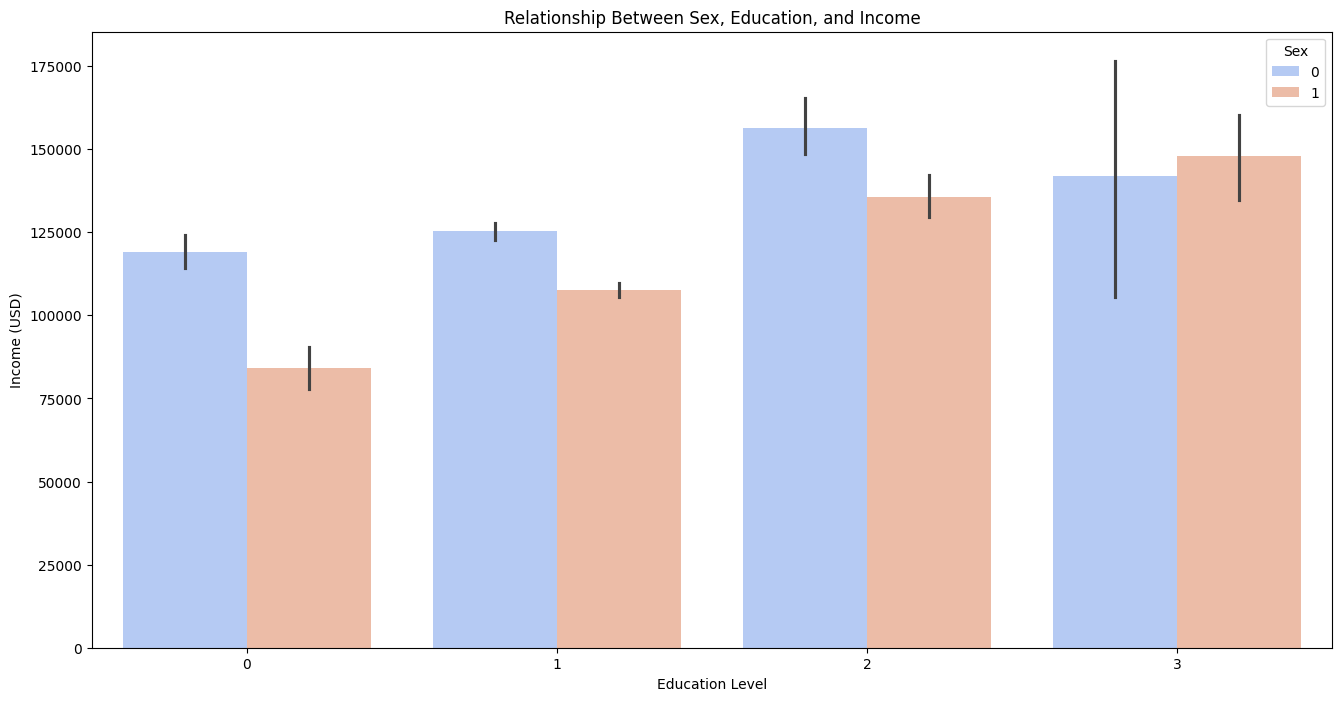

In [ ]:
# Do males and females with similar education levels have similar income levels?
plt.figure(figsize=(16, 8))
sns.barplot(x='Education', y='Income', hue='Sex', data=df, palette='coolwarm')
plt.xlabel('Education Level')
plt.ylabel('Income (USD)')
plt.title('Relationship Between Sex, Education, and Income')
plt.show()


In Education Levels 0 (unknown education), 1 (high school), and 2 (university), males consistently demonstrate a higher average income than females. However, a notable exception is observed in the case of graduate school, where females surpass males in average income.


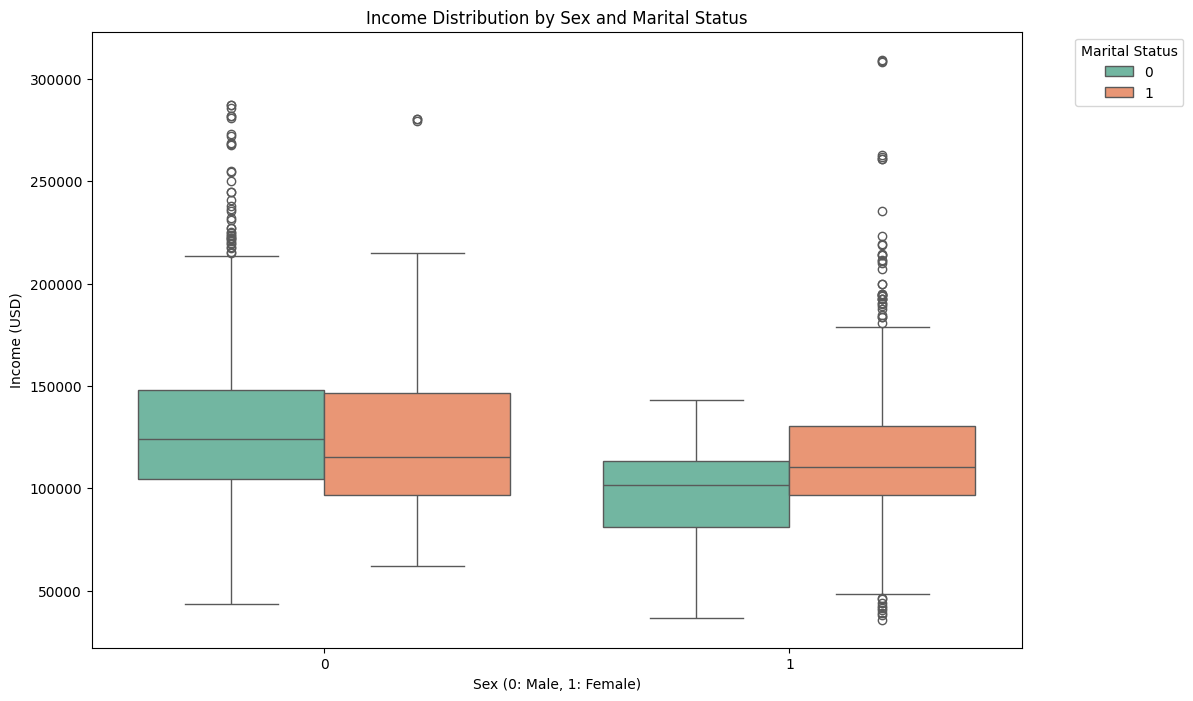

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Sex', y='Income', hue='Marital status', data=df, palette='Set2')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Income (USD)')
plt.title('Income Distribution by Sex and Marital Status')
plt.legend(title='Marital Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In the context of marital status, distinct patterns emerge. For unmarried individuals, males exhibit a higher median income, accompanied by notable outliers, reinforcing the observation that males tend to have higher incomes in this category.

However, among married individuals, females display a higher median income, supported by the presence of significant income outliers.

Marital status should be taken into account when studying income disparities.

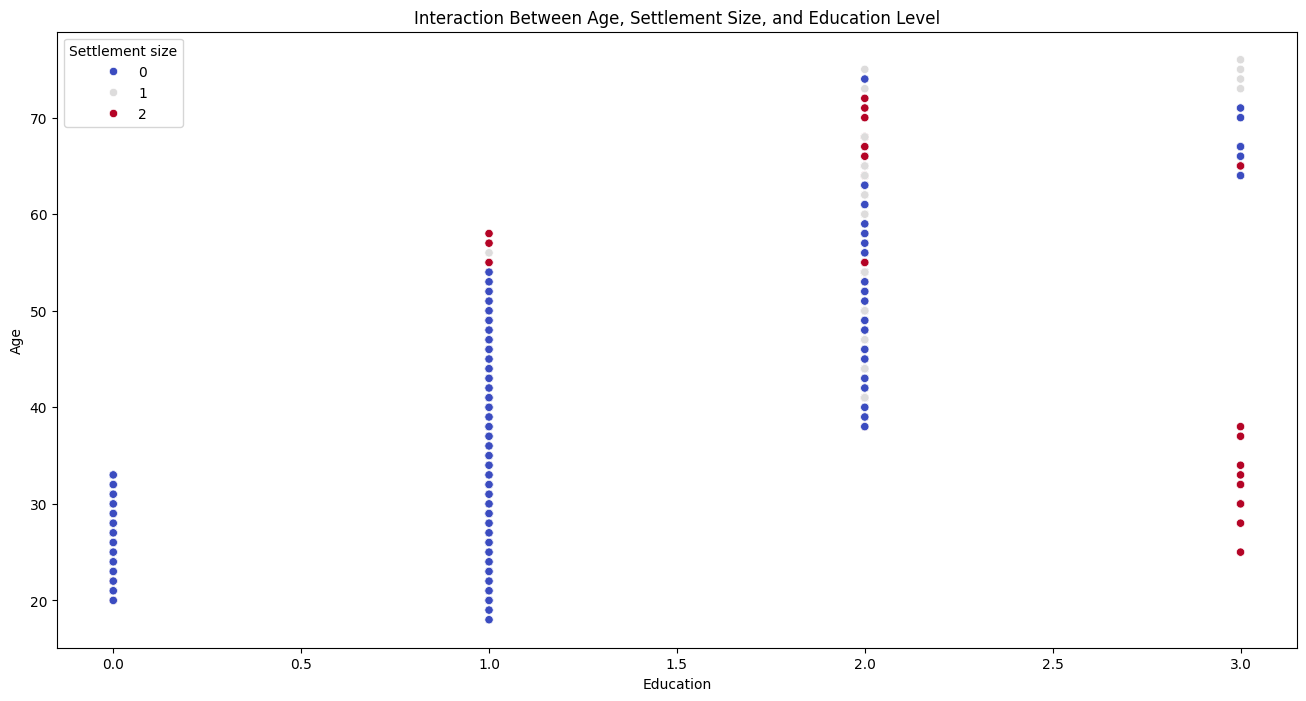

In [ ]:
#	How does age interact with both settlement size and education level?
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Education', y='Age', hue='Settlement size', data=df, palette='coolwarm')
plt.xlabel('Education')
plt.ylabel('Age')
plt.title('Interaction Between Age, Settlement Size, and Education Level')
plt.show()

Individuals with unknown education levels predominantly reside in small-sized settlements and are within the age range of 20-34.

Those with a high school education level are found in both small-sized and big cities, with age ranging from 20-58.

Individuals with a university education level are distributed across all settlement sizes and tend to be above 40 years old.

Those with a graduate school education level exhibit clustered age ranges. Individuals in their late 20s and early 30s are predominantly from big cities, while those in their 60s are a mix of mid-sized and small-sized cities.